<strong style="color: violet; font-size:50px">Bundesliga Scraper</strong>

<img style="float: left;" src="https://upload.wikimedia.org/wikipedia/en/d/df/Bundesliga_logo_%282017%29.svg">

In [1]:
from selenium import webdriver
import time
from tqdm import tqdm
import pandas as pd

In [2]:
driver = webdriver.Opera(executable_path=r"C:\Users\sharm\Downloads\operadriver_win64\operadriver.exe") ##path to your operadriver executable
secs = 12
web_elements_dict = {"top-speed": 5, 
                     "distance": 16, 
                     "sprints": 17, 
                     "intensive-runs": 18} ##indices of the divs from the site
dfs = []

In [3]:
for key, value in web_elements_dict.items():
    url = f"https://www.bundesliga.com/en/bundesliga/stats/players/{key}"

    load_xpath = f"/html/body/app-root/wrapper-page/div/div/div/div/div/stats-page/div/div[3]/div/stats-rankings-players/div/div/div[{value}]/button"
    table_div_xpath = f"/html/body/app-root/wrapper-page/div/div/div/div/div/stats-page/div/div[3]/div/stats-rankings-players/div/div/div[{value}]"

    driver.get(url)
    time.sleep(secs)

    load_button = driver.find_element_by_xpath(load_xpath)
    for _ in tqdm(range(55), desc=f"Loading {key} data..."):
        time.sleep(1.7)
        load_button.click()

    data = driver.find_element_by_xpath(table_div_xpath).text
    t = data.split("\n")
    player_data_dict = {t[2]: float(t[3])}
    for name, value in zip(t[4:-1:2], t[5:-1:2]):
        name = ''.join([i for i in name if not i.isdigit()])
        player_data_dict[name] = float(value)
    df = pd.DataFrame(list(player_data_dict.items()), columns=["player_name", key])
    dfs.append(df)
    print("Done.")

Loading top-speed data...: 100%|██████████| 55/55 [01:39<00:00,  1.80s/it]


Done.


Loading distance data...: 100%|███████████| 55/55 [01:37<00:00,  1.77s/it]


Done.


Loading sprints data...: 100%|████████████| 55/55 [01:39<00:00,  1.81s/it]


Done.


Loading intensive-runs data...: 100%|█████| 55/55 [01:40<00:00,  1.82s/it]


Done.


In [4]:
df = dfs[0]
for dfx in dfs[1:]:
    df = df.merge(dfx, on='player_name')
df.head()

,player_name,top-speed,distance,sprints,intensive-runs
0,Jeremiah St. Juste,36.10,331.7,573.0,1660.0
1,Erling Haaland,36.04,275.9,709.0,1804.0
2,Alphonso Davies,35.97,212.8,679.0,1596.0
3,Maxence Lacroix,35.75,295.8,595.0,1744.0
4,Kingsley Coman,35.68,213.5,550.0,1498.0


In [5]:
df.to_csv("bundesliga_distance-stats.csv", index=False)

### Plot Data

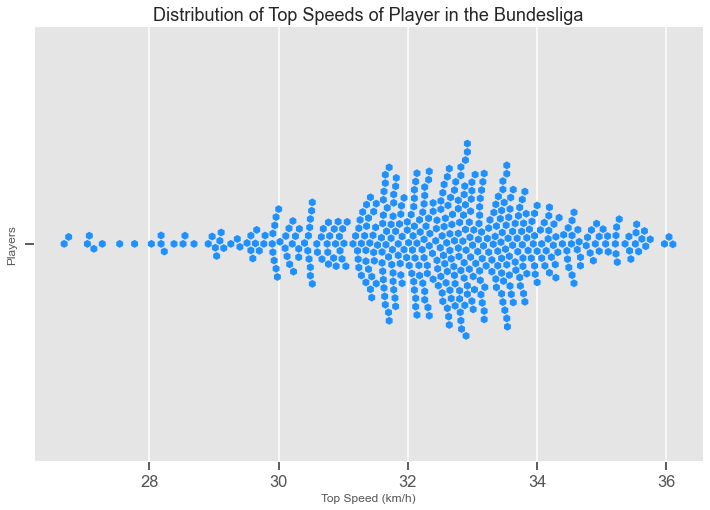

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context("ggplot"):
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.swarmplot(x=df['top-speed'], ax=ax, edgecolor='k', color='dodgerblue', size=8, marker="h")
ax.set(title="Distribution of Top Speeds of Player in the Bundesliga", 
       ylabel="Players", xlabel="Top Speed (km/h)");  